RF for classifying material with BG between 0.25 to 0.5 as thermoelec. 
Import dependencies

In [130]:
import numpy as np 
import pandas as pd 
import csv
from sklearn.preprocessing import Imputer
%matplotlib inline
import numpy as np 
import pandas as pd 
from sklearn.metrics import r2_score
import csv
from io import StringIO
#import missingno as msno
import io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('PDF')
#from StringIO import StringIO
from sklearn import cross_validation,linear_model, metrics, pipeline, preprocessing
from sklearn.preprocessing import FunctionTransformer
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler  
import calendar

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Import the file.

In [214]:
datamldb = pd.read_csv('initial_db.csv',sep=',')
#Look into the format of the imported data

#datamldb=datamldb.dropna()



In [215]:
datamldb.drop(['Unnamed: 62','electrical_resistivity variance','electrical_resistivity mean',],inplace=True,axis = 1)
#'Total row #1','Total row #2','Total row #3','Total row #4','Total row #5','Total row #6','Total row #7','Total row #8','Total row #9','atomic_mass mean','atomic_radius mean','X mean','valence_electrons mean'
#datamldb.drop(['Total 1s electrons','Total 2s electrons','Total 2p electrons','Total 3s electrons','Total 3p electrons','Total 4s electrons','Total 3d electrons','Total 4p electrons','Total 5s electrons','Total 4d electrons'],inplace=True,axis = 1)
#datamldb.drop(['Total 5p electrons','Total 6s electrons','Total 4f electrons','Total 5d electrons','Total 6p electrons','Total 7s electrons'],inplace=True,axis = 1)
#datamldb.drop(['Total 5f electrons','Total 6d electrons','Total 7p electrons'],inplace=True,axis = 1)
import matplotlib.pyplot as plt
#plt.plot(datamldb.isnull().sum())
#plt.show()

print(datamldb.isnull().sum())

cs=datamldb.size
csmissing=datamldb.isnull().sum(axis=0).sum()
#csmissing1=datamldb.isnan().sum(axis=0).sum()
print("Rows in cycle data ",len(datamldb))
print('percentmissing',csmissing)
#print('percentmissing',csmissing1)
print('fractionpercentmissing',(csmissing/cs))
print('original',datamldb.shape)
print(datamldb.head())
datamldb.loc[:, datamldb.isnull().any()]
datamldb=datamldb.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('original',datamldb.shape)

pretty_formula                 1
full_formula                   0
atomic_mass variance           0
atomic_mass mean               0
atomic_radius variance        99
atomic_radius mean            99
X variance                     9
X mean                         0
valence_electrons variance     0
valence_electrons mean         0
Total group #1                 0
Total group #2                 0
Total group #3                 0
Total group #4                 0
Total group #5                 0
Total group #6                 0
Total group #7                 0
Total group #8                 0
Total group #9                 0
Total group #10                0
Total group #11                0
Total group #12                0
Total group #13                0
Total group #14                0
Total group #15                0
Total group #16                0
Total group #17                0
Total group #18                0
Total row #1                   0
Total row #2                   0
Total row 

In [133]:
datamldb.describe()

,atomic_mass variance,atomic_mass mean,atomic_radius variance,atomic_radius mean,X variance,X mean,valence_electrons variance,valence_electrons mean,Total group #1,Total group #2,...,Total 5d electrons,Total 6p electrons,Total 7s electrons,Total 5f electrons,Total 6d electrons,Total 7p electrons,density,e_above_hull,symmetry_group,band_gap
count,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,...,69538.000000,69538.000000,69538.000000,69538.000000,69538.000000,69538.0,69538.000000,69538.000000,69538.000000,69538.000000
mean,1612.529504,55.532870,0.157063,1.087315,0.625708,2.422747,4.111393,4.141845,3.493586,0.913184,...,1.901148,0.335155,0.061031,0.075743,0.033981,0.0,5.213410,0.075272,87.594768,1.339850
std,1903.443433,39.157222,0.129391,0.300918,0.446631,0.503492,6.229499,1.356998,8.841011,3.363431,...,3.878366,1.190855,0.345340,0.532695,0.214811,0.0,2.731211,0.189321,81.780152,1.616871
min,0.000000,1.007940,0.000000,0.250000,0.000000,0.790000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.023670,0.000000,1.000000,0.000000
25%,243.381703,25.574327,0.059901,0.868210,0.216225,2.020000,1.868512,3.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.225466,0.000000,12.000000,0.000000
50%,824.134954,42.523029,0.137222,1.000000,0.599495,2.566429,3.673469,4.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.499714,0.017675,62.000000,0.606300
75%,2385.111744,74.575651,0.212755,1.325000,0.947700,2.792222,4.888889,4.875000,4.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.572023,0.073842,164.000000,2.378450
max,13594.277430,244.000000,1.380625,2.600000,2.544025,3.980000,72.250000,18.000000,144.000000,149.000000,...,30.000000,12.000000,4.000000,8.000000,3.000000,0.0,24.579226,5.891889,230.000000,9.362300


In [134]:
list(datamldb.columns.values)

['pretty_formula',
 'full_formula',
 'atomic_mass variance',
 'atomic_mass mean',
 'atomic_radius variance',
 'atomic_radius mean',
 'X variance',
 'X mean',
 'valence_electrons variance',
 'valence_electrons mean',
 'Total group #1',
 'Total group #2',
 'Total group #3',
 'Total group #4',
 'Total group #5',
 'Total group #6',
 'Total group #7',
 'Total group #8',
 'Total group #9',
 'Total group #10',
 'Total group #11',
 'Total group #12',
 'Total group #13',
 'Total group #14',
 'Total group #15',
 'Total group #16',
 'Total group #17',
 'Total group #18',
 'Total row #1',
 'Total row #2',
 'Total row #3',
 'Total row #4',
 'Total row #5',
 'Total row #6',
 'Total row #7',
 'Total row #8',
 'Total row #9',
 'Total 1s electrons',
 'Total 2s electrons',
 'Total 2p electrons',
 'Total 3s electrons',
 'Total 3p electrons',
 'Total 4s electrons',
 'Total 3d electrons',
 'Total 4p electrons',
 'Total 5s electrons',
 'Total 4d electrons',
 'Total 5p electrons',
 'Total 6s electrons',
 'To

In [216]:
# Drop by Name
X2= datamldb.drop(['band_gap','e_above_hull','pretty_formula','full_formula'], axis=1)
#X2 = datamldb[['atomic_mass variance', 'atomic_radius variance',]]
# Select the ones you want
y2 = datamldb[['band_gap', 'e_above_hull']]
# Convert to matrices 
X2 = np.matrix(X2.values)
y2 = np.array(y2.values)
print(datamldb.shape, X2.shape, y2.shape)

(69538, 60) (69538, 56) (69538, 2)


In [136]:
#print(y2[:10,0],y2[:10,1])

In [137]:
#print(datamldb.drop(['band_gap','e_above_hull'], axis=1).columns.values)

In [217]:
S300099=datamldb.drop(['band_gap','e_above_hull','pretty_formula','full_formula'], axis=1).copy()
print(S300099['symmetry_group'])

S300099_symmetry = pd.get_dummies(S300099['symmetry_group'])
S300099new=S300099.drop(['symmetry_group'], axis=1).copy()
S300099new = pd.concat([S300099new,S300099_symmetry], axis=1)

print('new',S300099new.shape,'old',S300099.shape)

#categorical_data_columns = ['symmetry_group'] 
#categorical_data_indices = np.array([(column in categorical_data_columns) for column in S300099.columns], dtype = bool)
##S300099.drop(categorical_data_columns,inplace=True, axis = 1)
#print('categoricaldata',categorical_data_indices)
##print(datamldb.drop(['band_gap','e_above_hull','symmetry_group'], axis=1).columns.values)
##numeric_data_columns = [' atomic_mass variance',' electrical_resistivity variance',' atomic_radius variance','WINDSPEED','DTC','xHOUR','yHOUR']
#numeric_data_columns=datamldb.drop(['band_gap','e_above_hull','symmetry_group'], axis=1).columns.values
numeric_data_columns=S300099new.columns.values
##print('after', S300099.shape)


##numeric_data_columns = ['TempC','Pptmm','Humidpercen','WINDSPEED']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in S300099new.columns], dtype = bool)
#print('numericdata',numeric_data_indices)
#['xHOUR','yHOUR','xdirection','ydirection','TempC','Pptmm','Humidpercen','AVGSPEED']

transformer_list = [        
            #binary
            #('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
 #         ('categorical_variables_processing', pipeline.Pipeline(steps = [
  #              ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
   #             ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
    #                 ])),
        ]

0        229
1        221
2        229
3        225
4        194
5        124
6        121
7        119
8        225
9        194
10        15
11       164
12       204
13       227
14       227
15       227
16       227
17       227
18       227
19        37
20       136
21       227
22       227
23         6
24        12
25        63
26        71
27        61
28        63
29       164
        ... 
69610    145
69611    156
69612      9
69613      7
69614    156
69615     31
69616      7
69617      7
69618      7
69619    160
69620      7
69621    160
69622    160
69623    160
69624    160
69625      7
69626    160
69627    160
69628    160
69629    160
69630    160
69631    160
69632    160
69633    160
69634    160
69635    160
69636    160
69637    160
69638      7
69639      7
Name: symmetry_group, Length: 69538, dtype: int64
new (69538, 278) old (69538, 56)


SPLIT TRAINING AND TEST DATA NEXT

In [218]:
#S300099.reindex(np.random.permutation(S300099.index))
#S300099['HOUR']=S3000991['HOUR']
from sklearn import preprocessing
S300099new_scaled = preprocessing.scale(S300099new)
#print(S300099new_scaled.mean(axis=0))
#print(S300099new_scaled.std(axis=0))

y1c=[1 if 0.25<=value<=0.5 else 0 for value in y2[:,0]]
print(len(y1c))
print(y1c.count(1))

X_train, X_test, y_train, y_test = train_test_split(S300099new_scaled,y1c,test_size=0.2,stratify=y1c,random_state = 2)

#X_train=X_train[:500,:]
#y_train=y_train[:500]

y_t=y_train
#.ravel()

#X_test=X_test[:100,:]
#y_test=y_test[:100]
#X_test=X_test.head(500)

y_test0=y_test
#.ravel()
#y_test0=y_test[:500]

#y_test1=y_test[:,1].ravel()
#y_test1=y_test1[:500]



69538
2694


In [140]:
#print(X_train.shape)
#print(y_train)
#y1c1=[1 if 0.25<=value<=0.5 else 0 for value in y_train]
#print(len(y_train))
#print(y_train.count(1))

#print(len(y_test))
#print(y_test.count(1))

In [141]:
def scoring(clf,score):
    scores = cross_val_score(clf, X_train, y_t, cv=3, n_jobs=5,scoring=score)
    print (np.median(scores))
    return np.median(scores)

In [142]:
def hypertune(estimator,tuned_parameters,cv1,X_train,y_train,y_test):
    #print (estimator,tuned_parameters,cv1)
    clf = GridSearchCV(estimator,tuned_parameters,cv=cv1)
#,scoring    
    clf.fit(X_train,y_train)
    print("Coefficients based on fit:")
    print()
    #print("Coefficient: ", clf.best_estimator_.steps[-1][1].coef_)   
    print()
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The R2 scores are computed on the full evaluation set, and is.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(r2_score(y_true, y_pred))
    print()
    return clf

In [143]:
def plot_learning_curve(estimator,outfile,title, X, y, ylim=None, cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.savefig(outfile,bbox_inches='tight')
    return (plt,train_sizes, train_scores, test_scores)

In [144]:
def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

In [145]:
# function takes a model parameter and a ranger and produces a plot and dataframe of CV scores for the parameter values
def evaluate_param(parameter, num_range, index,clf,y_train):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(X_train, y_train) #features
    
    df = {}
#    grid_search.cv
#    for i, score in enumerate(grid_search.grid_scores_):
#        df[score[0][parameter]] = score[1]
 
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    print('means',means,num_range)
#from operator import itemgetter
#paramvalues=map(itemgetter(1),grid_search.cv_results_['params'])
#print('paramvalues',paramvalues)
#grid_search.cv_results_['params'].values()))
    
#    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    plt.subplot(2,2,index)
    plot = plt.plot(num_range,means)
    plt.title(parameter)
    return plot
#    df = pd.DataFrame.from_dict(df, orient='index')
#    df.reset_index(level=0, inplace=True)
#    df = df.sort_values(by='index')
 

feature Index([      'atomic_mass variance',           'atomic_mass mean',
           'atomic_radius variance',         'atomic_radius mean',
                       'X variance',                     'X mean',
       'valence_electrons variance',     'valence_electrons mean',
                   'Total group #1',             'Total group #2',
       ...
                                221,                          222,
                                223,                          224,
                                225,                          226,
                                227,                          228,
                                229,                          230],
      dtype='object', length=278)
means [ 0.96036311  0.96045299] [70 90]


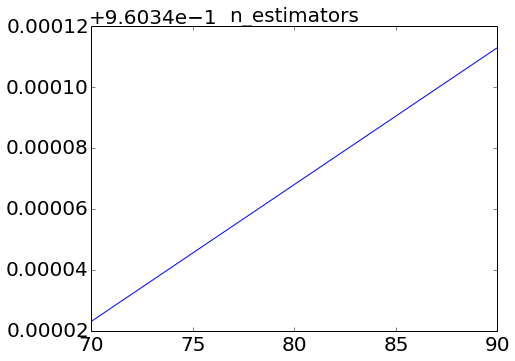

In [146]:
#ESTIMATE ONE PARAMETER AT A TIME
rfr1 = RandomForestClassifier(n_estimators = 100,
                            min_samples_leaf = 1, #max_leaf_nodes=50, #max_depth=20,
                            random_state = 2)
param_gridrf = {"n_estimators": np.arange(70,110,20),
#             "max_depth": np.arange(1,20,2),
#              "min_samples_split": np.arange(1,15,3),
#              "min_samples_leaf": np.arange(1,30,6),
#              "max_leaf_nodes": np.arange(90,151,30),
#             "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)
               }
features = S300099new.columns
print('feature',features)
#y_t=y_train[:,0].ravel()
#print('trainsize',X_train.shape)
#print('trainsize',y_t.shape)
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_gridrf):   
    evaluate_param(parameter, param_range, index,rfr1,y_t)
    index += 1
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24
plt.savefig('randomforestparavarclass2.pdf',bbox_inches='tight')  

rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 4, max_leaf_nodes=50,max_depth=15,
                            random_state = 2)
#scoring(rfr)    


gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
#scoring(gbr)

dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)



print ('yt',np.max(y_t))
#print ('yt',y_t.dtype.char == 'S') 

#checking for sensitivity of parameters


estimatorrfr = pipeline.Pipeline(steps = [       
   ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', rfr)
    ])
param_grid = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#'n_estimators': [50,100,10]
}
   
    
#grid_cv=hypertune(estimatorrfr,param_grid,3,X_train,y_t,y_test)
#print (grid_cv.best_estimator_)
clf=GridSearchCV(estimatorrfr,param_grid,3)



print('gridcv', clf)
##,scoring    
clf.fit(X_train,y_train)
##grid_cv.fit(X_train,y_train)
#predicted = clf.best_estimator_.predict(X_test)
##print('gridcv', grid_cv)
print('importance',estimatorrfr.named_steps["model_fitting"].feature_importances_)




title = "Learning Curves Random Forest"
out_file1=('RFFitLC.pdf')
plt1,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
RFTS=train_sizes
RFTSco=train_scores
RFTeSco=test_scores
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=16
plt.rcParams['axes.labelsize']=16

In [147]:
def plot_measured_prediction(title,y_test,predicted,out_file):
    fig, ax = plt.subplots()
    ax.scatter(y_test, predicted, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.title(title)
    plt.savefig(out_file,bbox_inches='tight')
    plt.show()
    return plt

title = "Fit measured Vs predicted"
out_file1=('RFFitPrediction.pdf')
plot_measured_prediction(title,y_test0,predicted,out_file1)

#y_test=y_test[:,1].ravel()
print ("Random Forest error in bar:", median_absolute_error(y_test0,predicted))

print(estimatorrfr.named_steps["model_fitting"])
#print(X_train.shape)
def plot_importances(model, model_name):
#    print(grid_search.best_estimator_.named_steps["clf"].feature_importances_)
    clf = GridSearchCV(model,{},3)
#,scoring    
    clf.fit(X_train,y_train)
    importances=model.named_steps["model_fitting"].feature_importances_
#    print('importance',importances)
# importances = model.feature_importances_
#   std = np.std([model.feature_importances_ for feature in model.estimators_],
    std = np.std([model.named_steps["model_fitting"].feature_importances_ for feature in model.named_steps["model_fitting"].estimators_],axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (12,5))
    plt.title("Feature importances of " + model_name)
    #del X_train['HOUR']
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    #print( X_train.columns[indices])
    plt.xticks(range(X_train.shape[1]),X_train.columns[indices])
    plt.xlim([-1, X_train.shape[1]])
    plt.savefig('importance.pdf',bbox_inches='tight')
    plt.show()
#print(estimatorrfr.named_steps["feature_processing"])  
print("Feature ranking:")

i = 0
for feature in X_train:
    print (i, feature)
    i += 1
    
plot_importances(estimatorrfr, "Random Forest Regressor")

In [148]:
rfr = RandomForestClassifier(n_estimators =100,
                            min_samples_leaf =1, # max_leaf_nodes=50,
                            random_state = 2)
#print("yt",y_t.shape)
rfr = rfr.fit(X_train, y_t)
importances = rfr.feature_importances_



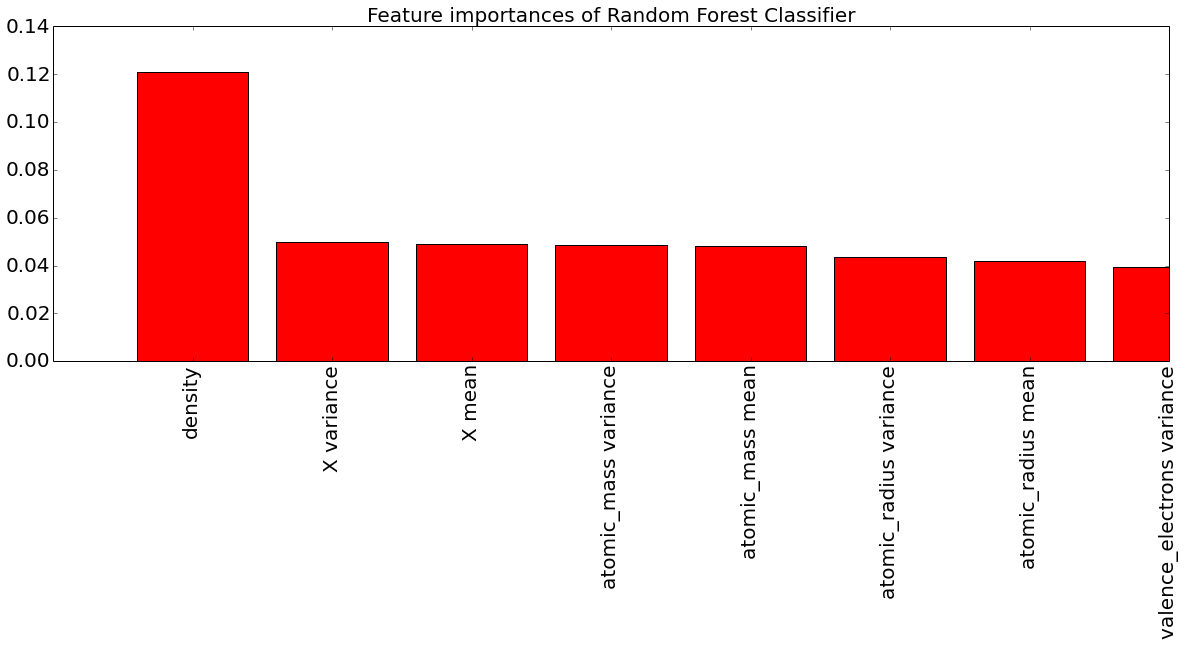

In [219]:
#print(X_train.shape)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)
plt.rcParams['font.size']=24
plt.rcParams['axes.labelsize']=24

def plot_importances2(model, model_name): 
    importances = model.fit(X_train, y_t).feature_importances_
    #importances = model.feature_importances_
    
    std = np.std([model.feature_importances_ for feature in model.estimators_])
    indices = np.argsort(importances)[::-1]  
    #print('indices'  ,' Name of column' 'Indice number of importance')
    #print(indices.T,X_train.columns[indices].T,importances[indices].T)
    plt.figure(figsize = (20,6))
    plt.title("Feature importances of " + model_name)
    plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X_train.shape[1]),S300099new.columns[indices])
    plt.xticks(rotation=90)
    #plt.xticks(range(X_train.shape[1]),indices)
    #plt.xlim([-1, X_train.shape[1]])
    plt.xlim([-1,7])
    plt.savefig('importanceclass1.pdf',bbox_inches='tight')
    plt.show()
    return indices
#print(estimatorrfr.named_steps["feature_processing"])  
#print("Feature ranking:")

i = 0
for feature in X_train:
    #print (i, feature)
    i += 1
    
index=plot_importances2(rfr, "Random Forest Classifier")

In [150]:
scoring(rfr,'accuracy')

0.9603084722


0.96030847219975191

In [251]:
scoring(rfr,'precision')
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. tp/(tp+fp)

0.426229508197


0.42622950819672129

In [252]:
scoring(rfr,'f1')

0.12380952381


0.1238095238095238

In [153]:
scoring(rfr,'recall')
#The recall is intuitively the ability of the classifier to find all the positive samples. it gives info on how lower is false negative. 

0.0724233983287


0.072423398328690811

In [300]:
def violinplot(data_in,key,target,xlabel,ylabel,title,out_file):
    col_order = np.sort(data_in[key].unique()).tolist()
    #plt.figure(figsize=(16,6))
    ax=sns.violinplot(x=key, y=target, data=data_in, order=col_order)
    #plt.ylim([-100,1000])
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.title(title, fontsize=25)
    #plt.show()
    #ax.set(ylim=(1.5,3))
    plt.savefig(out_file,bbox_inches='tight')
    #plt.show()
    return ax

sns.set(font_scale=2.1)
ax=sns.heatmap(corrMatt, vmax=1, square=True,center=0,linewidths=.5,cmap="YlGnBu")
for label in ax.get_yticklabels():
        label.set_weight("bold")
for label in ax.get_xticklabels():
        label.set_weight("bold")
        
fig.savefig('cycleCorrelations.pdf',bbox_inches='tight')

In [161]:
datamldb.head()

,pretty_formula,full_formula,atomic_mass variance,atomic_mass mean,atomic_radius variance,atomic_radius mean,X variance,X mean,valence_electrons variance,valence_electrons mean,...,Total 5d electrons,Total 6p electrons,Total 7s electrons,Total 5f electrons,Total 6d electrons,Total 7p electrons,density,e_above_hull,symmetry_group,band_gap
0,Cs,Cs1,0.000000,132.905452,0.000000,2.600000,0.000000,0.790000,0.000000,1.000000,...,0,0,0,0,0,0,1.899815,0.000000,229,0.000
1,As,As2,0.000000,74.921600,0.000000,1.150000,0.000000,2.180000,0.000000,5.000000,...,0,0,0,0,0,0,6.064411,0.107405,221,0.000
2,Hf,Hf1,0.000000,178.490000,0.000000,1.550000,0.000000,1.300000,0.000000,2.000000,...,2,0,0,0,0,0,13.343940,0.183380,229,0.000
3,BaTe,Ba1Te1,23.653632,132.463500,0.140625,1.775000,0.366025,1.495000,4.000000,4.000000,...,0,0,0,0,0,0,4.937885,0.000000,225,1.593
4,Hf2S,Hf4S2,4764.506806,129.681667,0.067222,1.366667,0.364089,1.726667,3.555556,3.333333,...,2,0,0,0,0,0,11.035291,0.000000,194,0.000


[54  4  5  0  1  2  3  6  7 23 27 29]


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


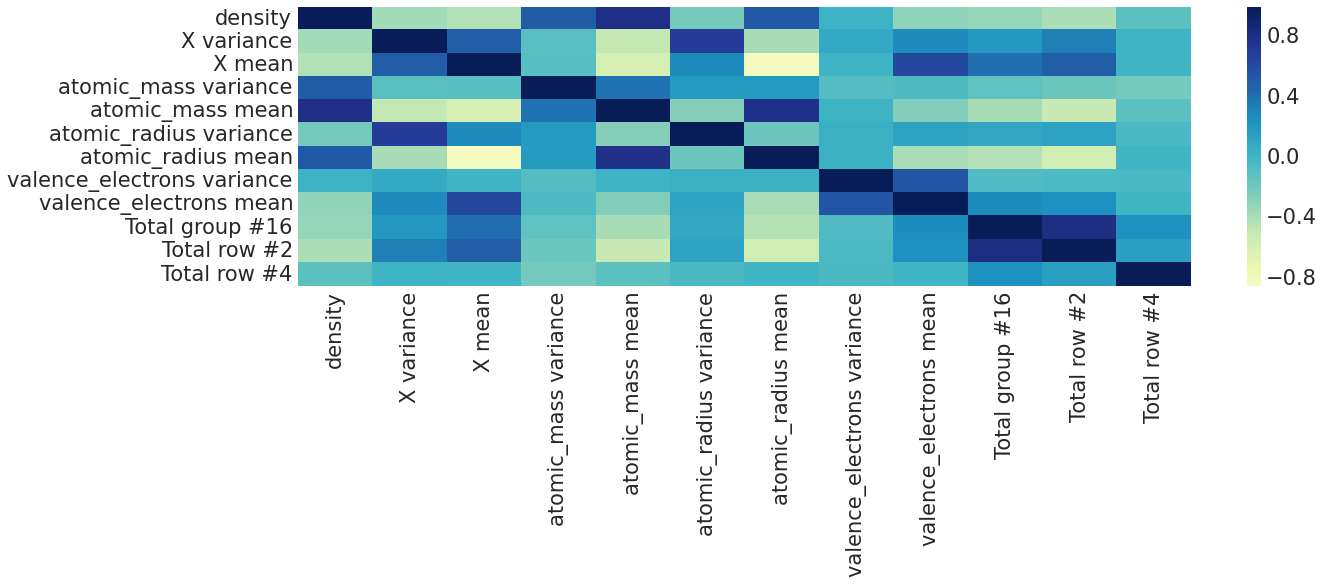

In [329]:
datamldb = datamldb.reset_index (drop = True)
print(index[:12])
datamldb1=S300099new.iloc[:,[54,4,5,0,1,2,3,6,7,23,27,29]]
#pdcorr=S300099new.iloc[:1000,index[:6]]
#print('shape' , pdcorr.shape)
#corrMatt=datamldb.corr
#print(corrMatt)
corrMatt = datamldb1.corr()
#corrMatt = S300099new_scaled[:,index[1:numbers]].corr
#mask = np.array(corrMatt)
#mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
#fig.set_size_inches(20,10)
#plt.matshow(corrMatt)
#sns.set(font_scale=2.1)
#import matplotlib.pyplot as plt
import seaborn as sns
ax=sns.heatmap(corrMatt,center=0,vmax=1,cmap="YlGnBu")
#for label in ax.get_yticklabels():
#        label.set_weight("bold")
#for label in ax.get_xticklabels():
#        label.set_weight("bold")
        
fig.savefig('Correlationsclass.pdf',bbox_inches='tight')
#violinplot(datamldb,'X variance','Band_gap','X variance','Band Gap','Band Gap vs Electronegativity','VarianceElectronegativityinf.pdf')

In [247]:
datamldb['ylc'] = y1c
#[:1000]

In [163]:
datamldb = datamldb.head(1000)

In [166]:
list(datamldb.columns.values)

['pretty_formula',
 'full_formula',
 'atomic_mass variance',
 'atomic_mass mean',
 'atomic_radius variance',
 'atomic_radius mean',
 'X variance',
 'X mean',
 'valence_electrons variance',
 'valence_electrons mean',
 'Total group #1',
 'Total group #2',
 'Total group #3',
 'Total group #4',
 'Total group #5',
 'Total group #6',
 'Total group #7',
 'Total group #8',
 'Total group #9',
 'Total group #10',
 'Total group #11',
 'Total group #12',
 'Total group #13',
 'Total group #14',
 'Total group #15',
 'Total group #16',
 'Total group #17',
 'Total group #18',
 'Total row #1',
 'Total row #2',
 'Total row #3',
 'Total row #4',
 'Total row #5',
 'Total row #6',
 'Total row #7',
 'Total row #8',
 'Total row #9',
 'Total 1s electrons',
 'Total 2s electrons',
 'Total 2p electrons',
 'Total 3s electrons',
 'Total 3p electrons',
 'Total 4s electrons',
 'Total 3d electrons',
 'Total 4p electrons',
 'Total 5s electrons',
 'Total 4d electrons',
 'Total 5p electrons',
 'Total 6s electrons',
 'To

#print(S300099new.columns[index[:15]])
f, ax = plt.subplots(2,3)
for numbers in range(0,5):
    #plt.figure()
    #plt.boxplot(S300099new_scaled[:,index[numbers]])
    #S300099new.iloc[:,index[numbers]].plot.box()
    #print(numbers)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


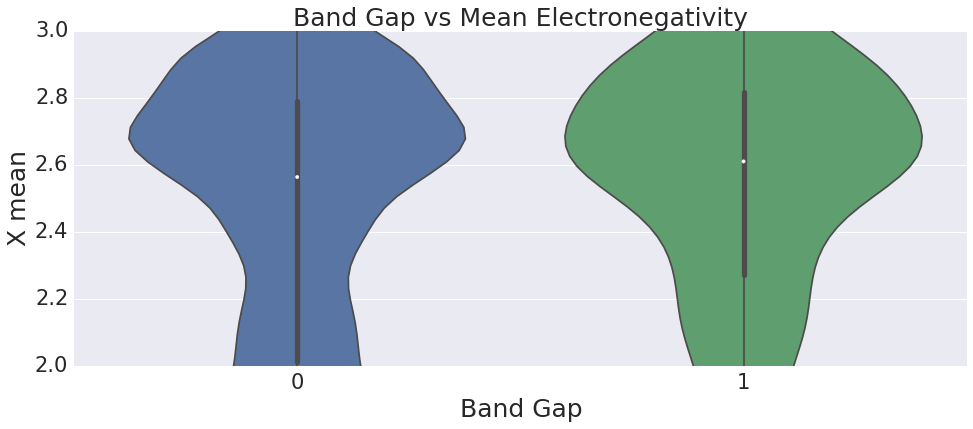

In [308]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(2,3))
ax=violinplot(datamldb,'ylc','X mean','Band Gap', 'X mean','Band Gap vs Mean Electronegativity','MeanElectronegativityinf.pdf')
plt.show()

In [309]:
mxm = pd.DataFrame(datamldb.groupby("ylc")["X mean"].describe())
print(mxm)

       count      mean       std     min   25%       50%       75%    max
ylc                                                                      
0    66844.0  2.418903  0.505824  0.7900  2.01  2.563846  2.791357  3.980
1     2694.0  2.518135  0.430945  1.1125  2.27  2.610455  2.818346  3.746


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


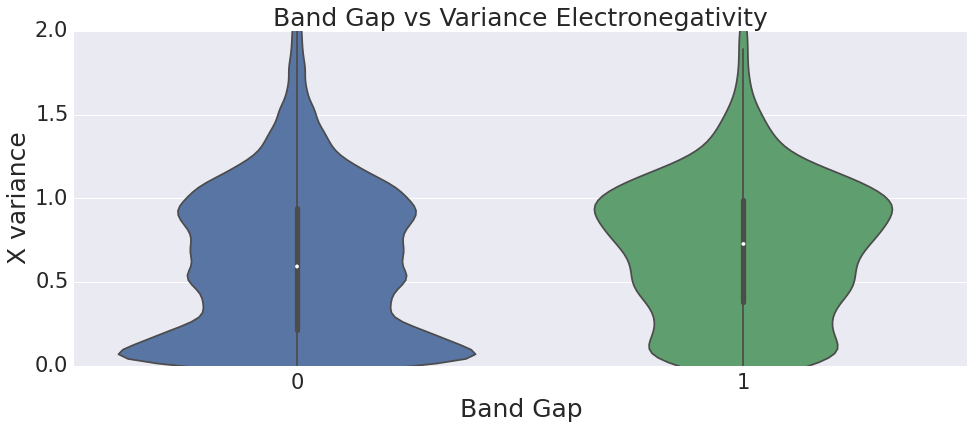

In [336]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,2))
ax=violinplot(datamldb,'ylc','X variance','Band Gap', 'X variance','Band Gap vs Variance Electronegativity','VarianceElectronegativityinf.pdf')
plt.show()

In [334]:
mxm = pd.DataFrame(datamldb.groupby("ylc")["X variance"].describe())
print("X variance")
print(mxm)

X variance
       count      mean       std  min      25%       50%       75%       max
ylc                                                                         
0    66844.0  0.622646  0.447866  0.0  0.21160  0.593420  0.945576  2.544025
1     2694.0  0.701674  0.407603  0.0  0.38256  0.728022  0.990875  2.325741


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


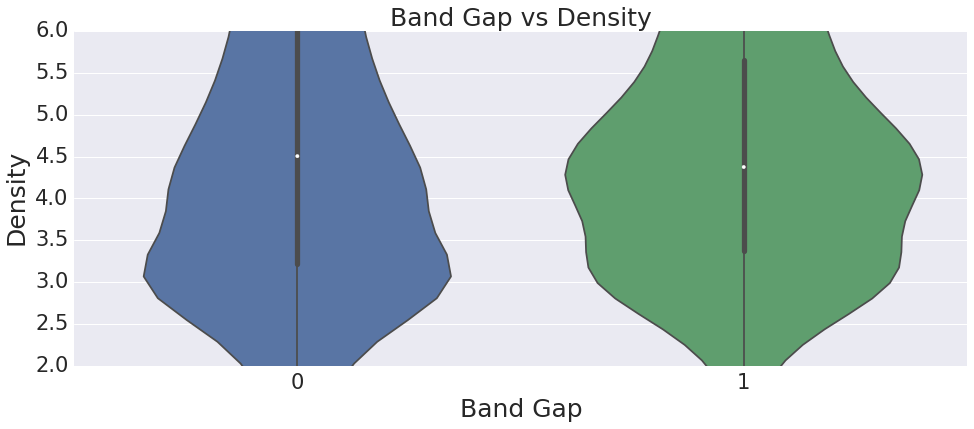

In [310]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(2,6))
violinplot(datamldb,'ylc','density','Band Gap','Density','Band Gap vs Density','Densityinf.pdf')

In [328]:
den = pd.DataFrame(datamldb.groupby("ylc")["density"].describe())
print('density statistics')
print(den)

density statistics
       count      mean       std       min       25%       50%       75%  \
ylc                                                                        
0    66844.0  5.232389  2.757891  0.023670  3.221316  4.504867  6.619998   
1     2694.0  4.742497  1.896452  0.628832  3.374362  4.374890  5.657868   

           max  
ylc             
0    24.579226  
1    17.359517  


(0, 20)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


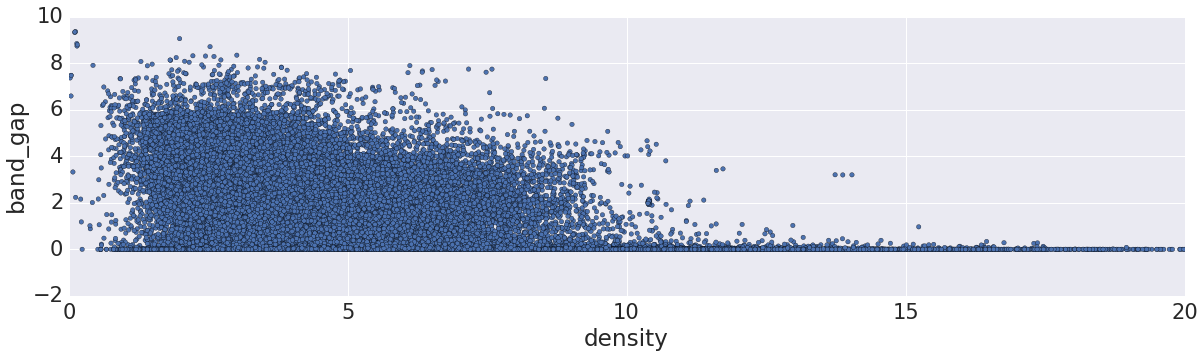

In [340]:
datamldb.plot.scatter(x='density', y='band_gap');
plt.xlim(0,20)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


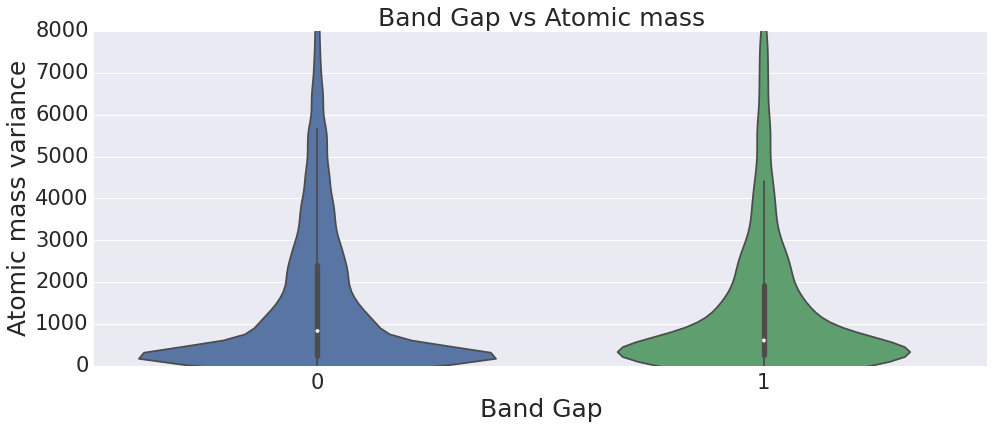

In [332]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(2,8000))
violinplot(datamldb,'ylc','atomic_mass variance','Band Gap','Atomic mass variance','Band Gap vs Atomic mass','Varianceatomicmassinf.pdf')

In [331]:
amv = pd.DataFrame(datamldb.groupby("ylc")["atomic_mass variance"].describe())
print("atomic mass variance")
print(amv)

atomic mass variance
       count         mean          std  min         25%         50%  \
ylc                                                                   
0    66844.0  1619.880225  1907.984723  0.0  241.188097  833.313708   
1     2694.0  1430.142115  1777.695578  0.0  266.880022  606.751380   

             75%           max  
ylc                             
0    2404.215197  13594.277430  
1    1935.358440  10219.552734  


datamldb.plot.scatter(x='atomic_mass variance', y='band_gap');

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


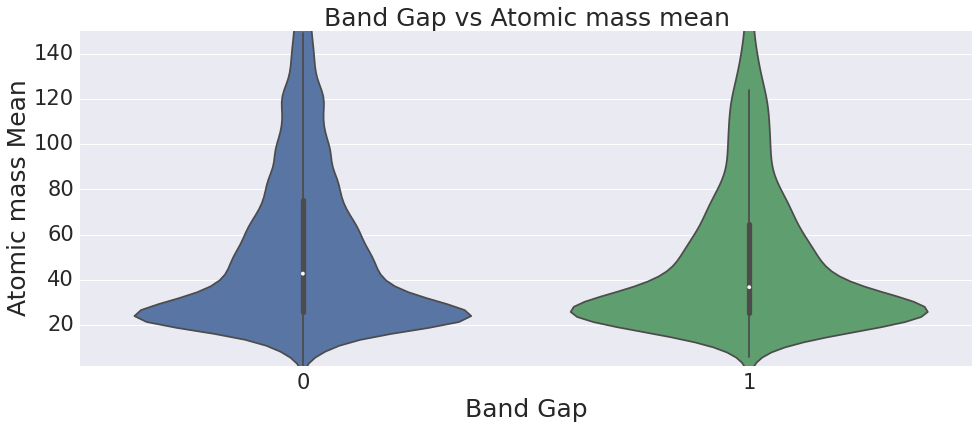

In [315]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(2,150))
violinplot(datamldb,'ylc','atomic_mass mean','Band Gap','Atomic mass Mean','Band Gap vs Atomic mass mean','Meanatomicmassinf.pdf')

In [314]:
amm = pd.DataFrame(datamldb.groupby("ylc")["atomic_mass mean"].describe())
print(amm)

       count       mean        std       min        25%        50%        75%  \
ylc                                                                             
0    66844.0  55.768346  39.363315  1.007940  25.591916  42.743259  75.079125   
1     2694.0  49.690214  33.115921  5.819689  25.186380  36.753121  64.789835   

        max  
ylc          
0    244.00  
1    200.59  


(0, 250)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


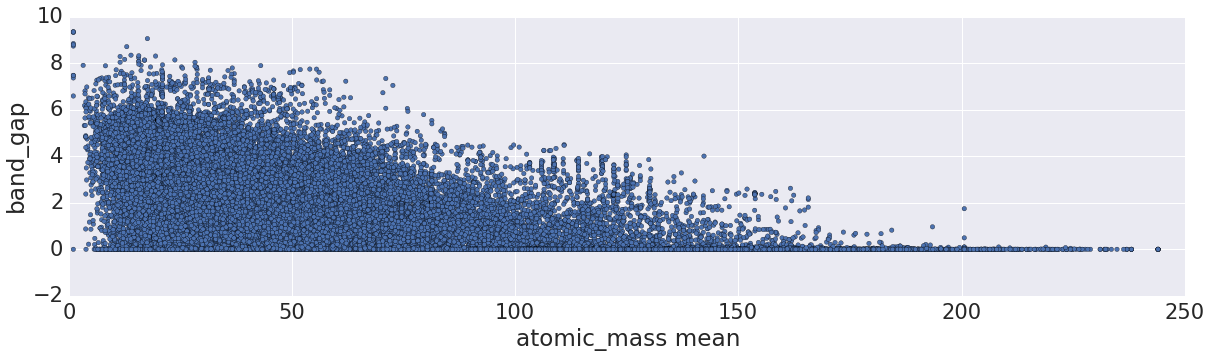

In [338]:
datamldb.plot.scatter(x='atomic_mass mean', y='band_gap');
plt.xlim(0,250)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


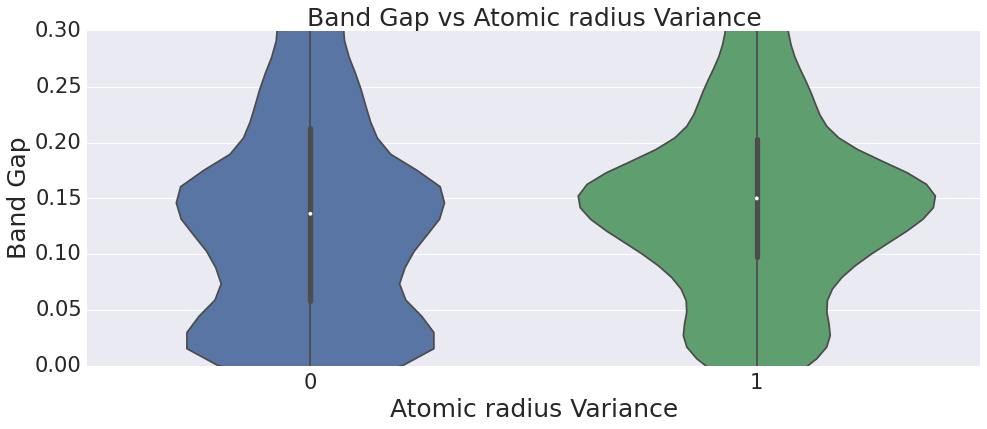

In [319]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,0.3))
violinplot(datamldb,'ylc','atomic_radius variance','Atomic radius Variance','Band Gap','Band Gap vs Atomic radius Variance','Varianceatomicradiusinf.pdf')

In [321]:
arv = pd.DataFrame(datamldb.groupby("ylc")["atomic_radius variance"].describe())
print("atomic radius variance difference")
print(arv)

atomic radius variance
       count      mean       std  min       25%       50%       75%       max
ylc                                                                          
0    66844.0  0.156848  0.130072  0.0  0.057751  0.136246  0.213395  1.380625
1     2694.0  0.162400  0.111052  0.0  0.097229  0.149981  0.203469  0.939400


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


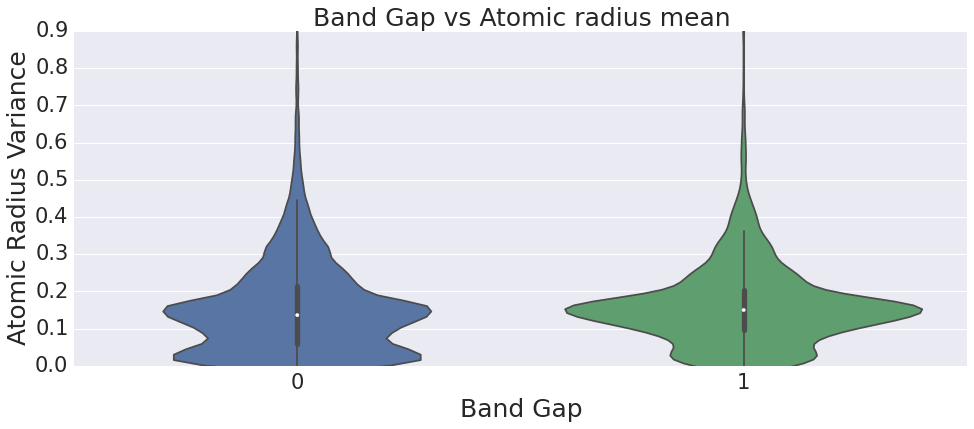

In [342]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,0.9))
violinplot(datamldb,'ylc','atomic_radius variance','Band Gap','Atomic Radius Variance','Band Gap vs Atomic radius mean','Mean_atomicmassinf.pdf')

In [322]:
arm = pd.DataFrame(datamldb.groupby("ylc")["atomic_radius mean"].describe())
print("atomic radius mean difference")
print(arm)

atomic radius mean difference
       count      mean       std   min       25%       50%       75%   max
ylc                                                                       
0    66844.0  1.088799  0.302131  0.25  0.868750  1.004167  1.330000  2.60
1     2694.0  1.050493  0.266493  0.40  0.866667  0.965385  1.221429  2.15


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


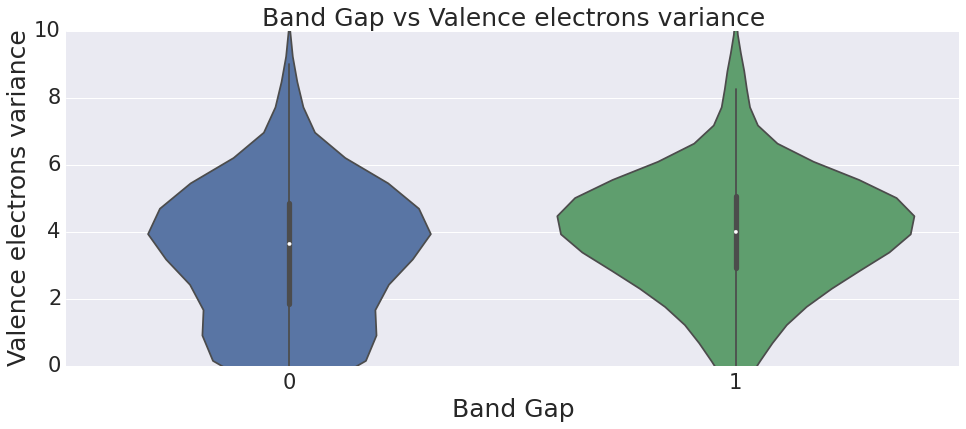

In [325]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,10))
violinplot(datamldb,'ylc','valence_electrons variance','Band Gap','Valence electrons variance','Band Gap vs Valence electrons variance','Variance_ValenceElectroninf.pdf')

In [324]:
vev = pd.DataFrame(datamldb.groupby("ylc")["valence_electrons variance"].describe())
print("valence_electrons variance difference")
print(vev)

valence_electrons variance difference
       count      mean       std  min       25%   50%       75%        max
ylc                                                                       
0    66844.0  4.106303  6.311927  0.0  1.836735  3.64  4.860220  72.250000
1     2694.0  4.237681  3.625683  0.0  2.909091  4.00  5.066327  50.666667


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


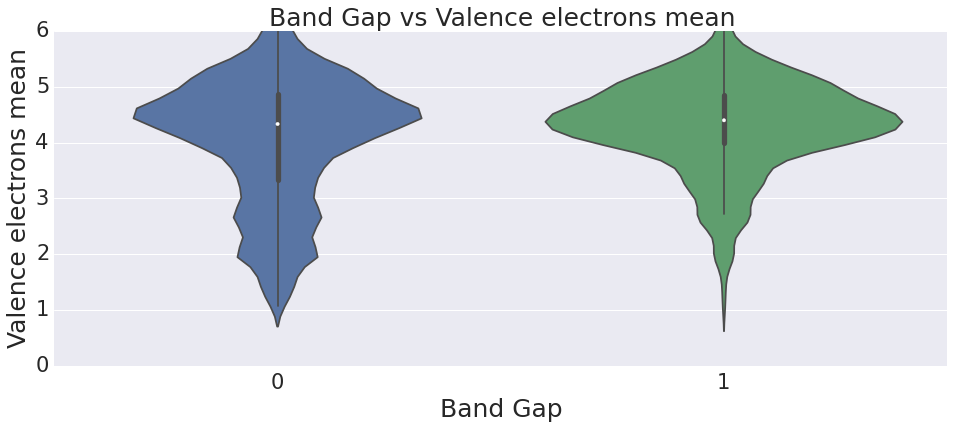

In [327]:
f,ax=plt.subplots(figsize=(16,6))
ax.set(ylim=(0,6))
violinplot(datamldb,'ylc','valence_electrons mean','Band Gap','Valence electrons mean','Band Gap vs Valence electrons mean','Mean_ValenceElectroninf.pdf')

In [326]:
vem = pd.DataFrame(datamldb.groupby("ylc")["valence_electrons mean"].describe())
print("valence_electrons mean difference")
print(vem)

valence_electrons mean difference
       count      mean       std  min       25%       50%       75%   max
ylc                                                                      
0    66844.0  4.133854  1.371055  1.0  3.333333  4.333333  4.875000  18.0
1     2694.0  4.340122  0.921640  1.0  4.000000  4.400000  4.857143  14.0


In [ ]:
df[df['ids'].str.contains("ball")]

http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py
cmap = plt.cm.RdYlBu
https://github.com/scikit-learn-contrib/imbalanced-learn

h= 0.02  # fine step width for decision surface contours
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
f, ax = plt.subplots()
    # Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_t, edgecolors='k')
    # and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.6,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

#if hasattr(rfr, "decision_function"):

#Z = rfr.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)
#cs = plt.contourf(xx, yy, Z, cmap=cmap)
        
#Z = rfr.decision_function(np.c_[xx.ravel(), yy.ravel()])
#else:
classi=rfr.fit(X_train, y_train)
score = rfr.score(X_test, y_test)
Z = classi.predict_proba(X_test)

        # Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
#ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # and testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())
#if ds_cnt == 0:
#    ax.set_title(name)
#    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
#    i += 1

plt.tight_layout()
plt.show()

estimator2 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('make_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),  
    ('model_fitting', gbr)
    ] )

#estimator2 = make_pipeline (pipeline.FeatureUnion(transformer_list=transformer_list),
#                           FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
#                           ('model_fitting', gbr))

param_grid2 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'n_estimators': [50,100,10]
}

grid_cv2=hypertune(estimator2,param_grid2,3,X_train,y_t,y_test0)


predicted2 = grid_cv2.best_estimator_.predict(X_test)

title = "Learning Curves GB"
out_file1=('GBFitLC.pdf')
plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv2.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
GBTS=train_sizes
GBTSco=train_scores
GBTeSco=test_scores

title = "Fit measured Vs predicted"
out_file1=('GB.pdf')
plot_measured_prediction(title,y_test0,predicted2,out_file1)

estimator3 = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', dtr)
    ] )
param_grid3 = {
# 'model_fitting__alpha' : [5,1,0.5,100,200]
#    'max_depth': [6,7,8]
}

grid_cv3=hypertune(estimator3,param_grid3,3,X_train,y_t,y_test0)

predicted3 = grid_cv3.best_estimator_.predict(X_test)


title = "Learning Curves DT"
out_file1=('DTFitLC.pdf')
plt,train_sizes, train_scores, test_scores=plot_learning_curve(grid_cv3.best_estimator_,out_file1,title,X_train,y_t, ylim=None,cv=3,n_jobs=1)
DTTS=train_sizes
DTTSco=train_scores
DTTeSco=test_scores
title = "Fit measured Vs predicted"
out_file1=('DT.pdf')
plot_measured_prediction(title,y_test0,predicted3,out_file1)

finalpredicted = 0.33*predicted + 0.33*predicted2 + 0.33*predicted3
title = "Fit measured Vs predicted"
out_file1=('Ensemble.pdf')
plot_measured_prediction(title,y_test0,finalpredicted,out_file1)

final_train_score=(RFTSco*0.333)+(GBTSco*0.333)+(DTTSco*0.333)
final_test_score=(RFTeSco*0.333)+(GBTeSco*0.333)+(DTTeSco*0.333)
title = "Learning Curves Ensemble"
outfile=('EFitLC.pdf')
plt.figure()
plt.title(title)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(final_train_score, axis=1)
train_scores_std = np.std(final_train_score, axis=1)
test_scores_mean = np.mean(final_test_score, axis=1)
test_scores_std = np.std(final_test_score, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.savefig(outfile,bbox_inches='tight')


print ("RF error of trip count:", median_absolute_error(y_test0,predicted))
print ("GBR Daily error of trip count:", median_absolute_error(y_test0,predicted2))
print ("DT Daily error of trip count:", median_absolute_error(y_test0,predicted3))
print ("Ensemble Daily error of trip count:", median_absolute_error(y_test0,finalpredicted))